In [1]:
load('interval_signals.py')

In [2]:
from flowstar.reachability import Poly, Reach, set_precision

In [3]:
set_precision(53)

In [4]:
varsd = [b't', b'x', b'y']
qt = Poly(1, 't', 0, varsd)
qx = Poly(-1, 'y', 1, varsd)
qy = Poly(1, 'x', 1, varsd)
print "t' = {}\nx' = {}\ny' = {}".format(qt, qx, qy)

D = Reach(
    varsd,
    [qt, qx, qy],
    [(0,0), (4,5), (1,2)],
    10,
    0.75,
    order=10,
    precondition=1,
    estimation=1e-1,
    cutoff_threshold=1e-20,
)

t' = (([1.0000000000e+00 , 1.0000000000e+00]))
x' = (([-1.0000000000e+00 , -1.0000000000e+00] * y))
y' = (([1.0000000000e+00 , 1.0000000000e+00] * x))


In [5]:
D.res

2

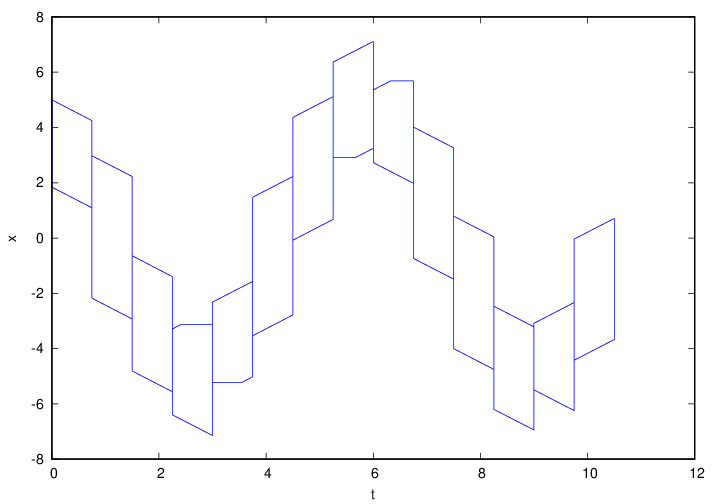

In [6]:
D.wplot('t', 'x')

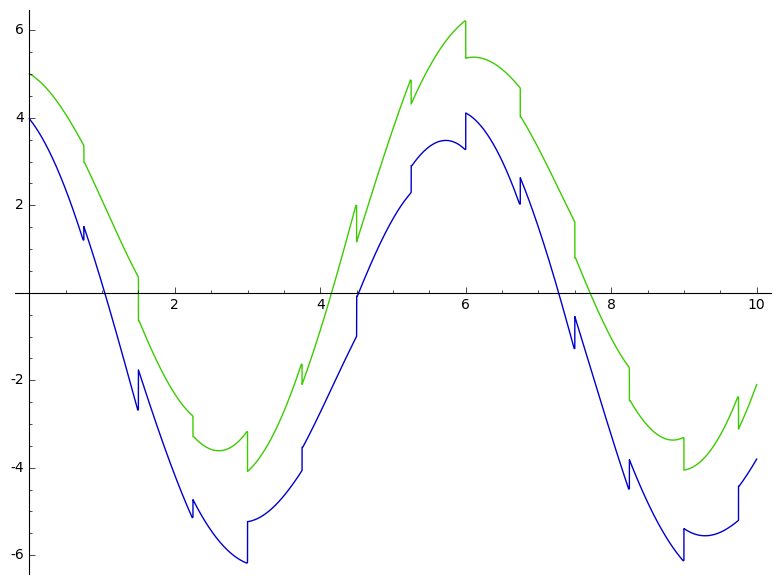

In [7]:
D.sage_plot('x')

In [8]:
def f(v, x):
    x = RIF(x)
    res = D(x)
    return RIF(res[varsd.index(v)])

In [9]:
from functools import partial

In [10]:
p1 = D.sage_plot('x')

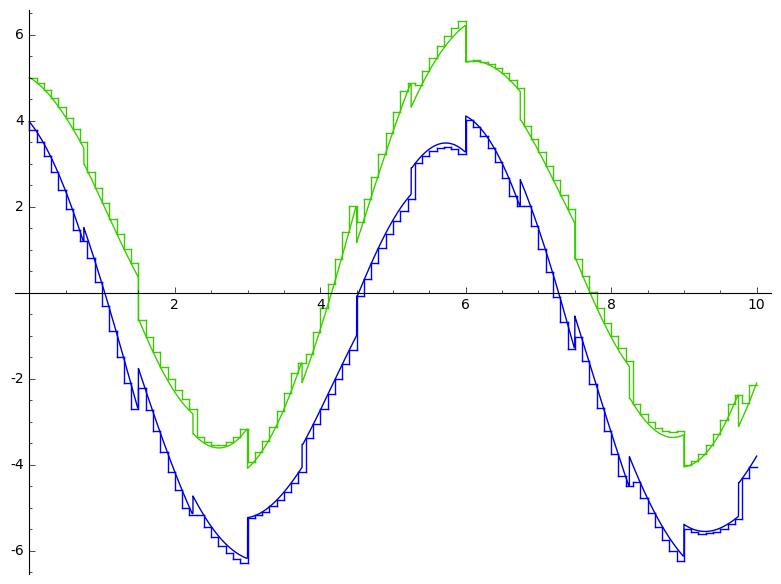

In [11]:
p1 + D.sage_plot_manual('x')

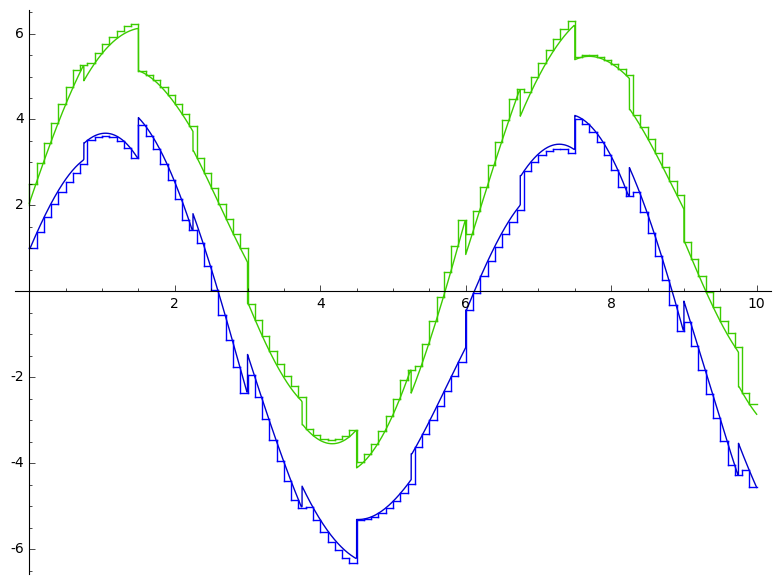

In [12]:
D.sage_plot('y') \
 + D.sage_plot_manual('y')

$x' = - y$

In [13]:
p2 = plot([(lambda t: -f('y', t).upper()),
          (lambda t: -f('y', t).lower())], (0, 10))

Will not work -- signal is discontinuous

In [14]:
sig = to_signal((lambda t: f('x', t)),
                (lambda t: -f('y', t)),
                RIF(0, 10))
sig

  I  = [0.00000000000000000 .. 1.0471492695953231]
f(I) = [1.0937496004676434 .. 5.0000004358456458]
  I  = [1.4050914784793122 .. 1.4060914784793124]
f(I) = [-2.1040595483314908 .. 0.62377237520894336]
  I  = [1.5082417358951532 .. 4.1673553930359431]
f(I) = [-7.1436637695751868 .. 0.046092880625733905]
  I  = [4.5186065624338800 .. 7.2874634128982319]
f(I) = [-0.077342758480222540 .. 7.1152626399656907]


Signal([0.00000000000000000 .. 10.000000000000000], [([0.00000000000000000 .. 1.0471492695953231], True), ([1.4050914784793122 .. 1.4060914784793124], False), ([1.5082417358951532 .. 4.1673553930359431], False), ([4.5186065624338800 .. 7.2874634128982319], True), ([7.6980858783546910 .. 10.000000000000000], False)])

In [15]:
sig = to_signal_bisection((lambda t: f('x', t)), RIF(0, 10), 0.1)

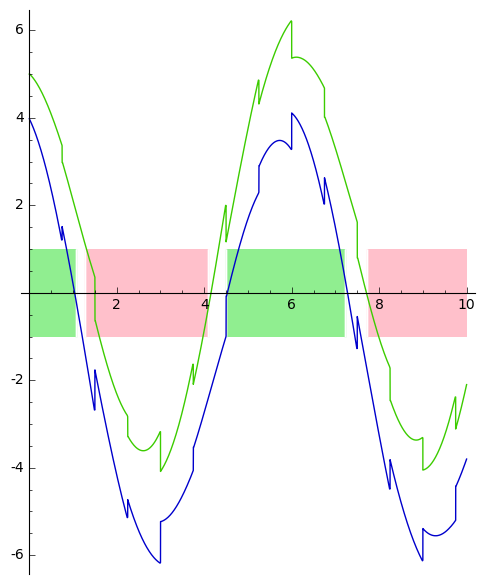

In [16]:
sig.plot() + p1

In [30]:
load('interval_root_isolation.py')

In [31]:
roots = list(isolate_roots((lambda t: f('x', t)),
                           (lambda t: -f('y', t)),
                           RIF(0,1.5)))
roots

tu = 1.04714901913587
tu = 1.05772050932723
tu = 1.06839771442050
tu = 1.07918169156471
tu = 1.09007350848035
tu = 1.10107424356516
tu = 1.11218498600081
tu = 1.12340683586082
tu = 1.13474090421942
tu = 1.14618831326162
tu = 1.15775019639423
tu = 1.16942769835818
tu = 1.18122197534176
tu = 1.19313419509518
tu = 1.20516553704613
tu = 1.21731719241659
tu = 1.22959036434075
tu = 1.24198626798416
tu = 1.25450613066400
tu = 1.26715119197064
tu = 1.27992270389035
tu = 1.29282193092925
tu = 1.30585015023855
tu = 1.31900865174093
tu = 1.33229873825834
tu = 1.34572172564092
tu = 1.35927894289733
tu = 1.37297173232631
tu = 1.38680144964957
tu = 1.40076946414607
tu = 1.41487715878753
tu = 1.42912593037540
tu = 1.44351718967915
tu = 1.45805236157595
tu = 1.47273288519171
tu = 1.48756021404362


[2.?]

In [32]:
roots += list(isolate_roots((lambda t: f('x', t)),
                           (lambda t: -f('y', t)),
                           RIF(1.5,2)))
roots

tu = 1.50000000000000
stopping since presumed converged
t = [1.5000000000000000 .. 1.5150999999999999], fprime(t) = [-5.1289522619859565 .. -4.0342777307933488]


[2.?, 1.51?]

In [33]:
roots[0].str(style='brackets')

'[1.0471490191358754 .. 1.5000000000000000]'

In [34]:
roots[1].str(style='brackets')

'[1.5000000000000000 .. 1.5150999999999999]'

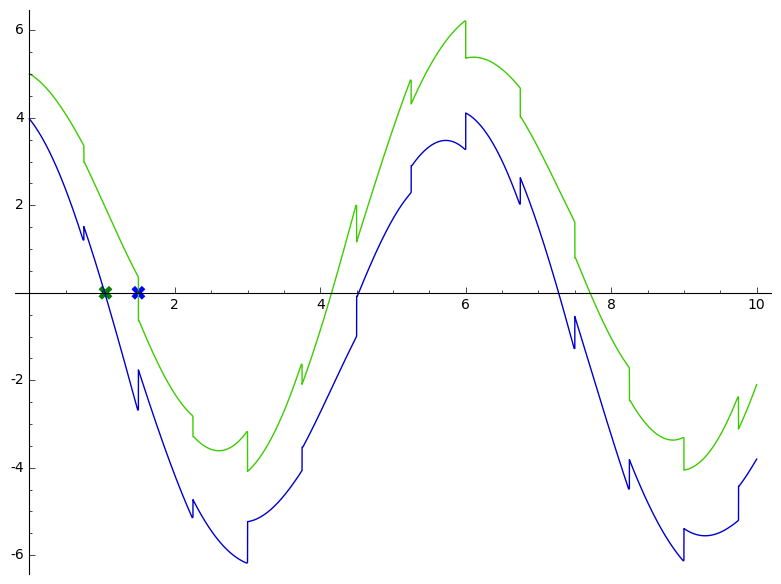

In [35]:
  p1 \
+ point((roots[0].lower(), 0), size=100, color='green', marker='X') \
+ point((roots[0].upper(), 0), size=100, marker='X')

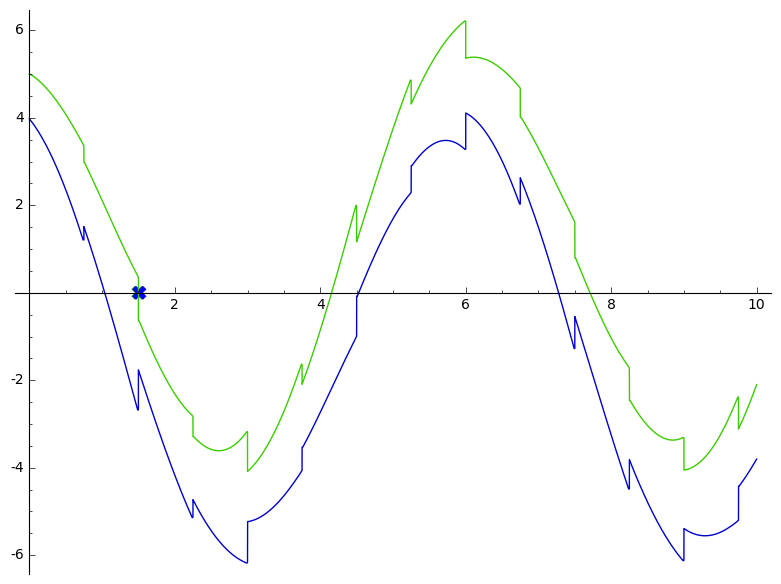

In [23]:
  p1 \
+ point((roots[1].lower(), 0), size=100, color='green', marker='X') \
+ point((roots[1].upper(), 0), size=100, marker='X')

In [24]:
sig = Signal(RIF(0), [])
step = 0.75
for i in range(10/step):
    sig = sig.union(to_signal((lambda t: f('x', t)),
                              (lambda t: -f('y', t)),
                              RIF(step*i, step*(i+1))))
sig

  I  = [0.75000000000000000 .. 1.0471493894806141]
f(I) = [-0.015530607801751001 .. 2.9768070823578757]
  I  = [3.7500000000000000 .. 4.1662557181795146]
f(I) = [-3.5312475405131308 .. 0.039526981690329859]
  I  = [6.7500000000000000 .. 7.2874626322614518]
f(I) = [-0.077337923106332363 .. 4.0150417763828239]


Signal([0.00000000000000000 .. 9.7500000000000000], [([0.00000000000000000 .. 1.0471493894806141], True), ([1.5150999999999998 .. 4.1662557181795146], False), ([4.5186047217334950 .. 7.2874626322614518], True), ([7.6980849541590412 .. 9.7500000000000000], False)])

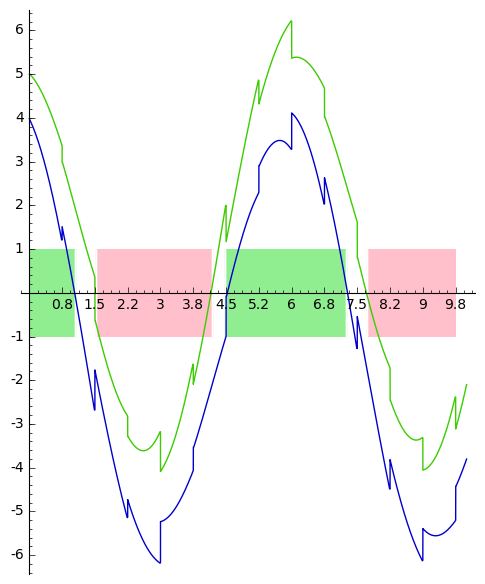

In [55]:
(sig.plot() + p1).show(ticks=[0.75, 1])

In [56]:
sig1 = Signal(RIF(0), [])
step = 0.75
for i in range(10/step):
    sig1 = sig1.union(to_signal_bisection((lambda t: f('x', t)),
                                          RIF(step*i, step*(i+1))))
sig1

Signal([0.00000000000000000 .. 9.7500000000000000], [([0.00000000000000000 .. 1.0312500000000000], True), ([1.5000000000000000 .. 4.1250000000000000], False), ([4.5937500000000000 .. 7.2187500000000000], True), ([7.7812500000000000 .. 9.7500000000000000], False)])

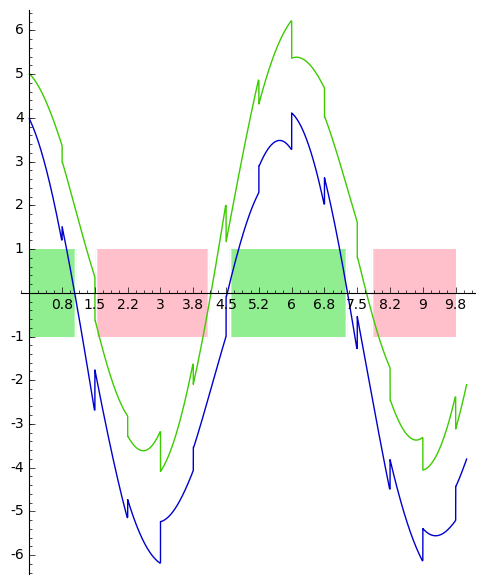

In [60]:
(sig1.plot() + p1).show(ticks=[0.75, 1])